# California Dataset Description

## Reading the I5-N3 dataset

In [1]:
import pandas as pd
import matplotlib as plot
import torch

In [10]:
cali_dataset_2015 = pd.read_csv("datasets/california_paper_eRCNN/I5-N-3/2015.csv")
cali_dataset_2016 = pd.read_csv("datasets/california_paper_eRCNN/I5-N-3/2016.csv")
cali_dataset_2016['timestep'] = cali_dataset_2016['timestep'] + cali_dataset_2015.tail(1)['timestep'].values + 1
cali_dataset = pd.concat([cali_dataset_2015, cali_dataset_2016])
cali_dataset.head()

,timestep,road_section,flow,density,speed
0,0,0,213.0,2.3,64.6
1,0,1,87.0,0.6,68.8
2,0,2,81.6,0.5,72.8
3,0,3,68.0,0.5,72.2
4,0,4,102.0,0.6,69.1


In [11]:
cali_dataset.describe()

,timestep,road_section,flow,density,speed
count,5.670000e+06,5.670000e+06,5.670000e+06,5.670000e+06,5.670000e+06
mean,1.049995e+05,1.300000e+01,9.695303e+02,7.596440e+00,6.411496e+01
std,6.062178e+04,7.788882e+00,5.205801e+02,5.894419e+00,9.594070e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,5.249975e+04,6.000000e+00,5.040000e+02,3.400000e+00,6.270000e+01
50%,1.049995e+05,1.300000e+01,1.064000e+03,6.900000e+00,6.650000e+01
75%,1.574992e+05,2.000000e+01,1.374000e+03,9.700000e+00,6.960000e+01
max,2.099990e+05,2.600000e+01,3.136800e+03,7.580000e+01,8.620000e+01


In [13]:
cali_avg_dataset = pd.DataFrame(columns=cali_dataset.columns)
cali_avg_dataset = cali_avg_dataset.append(
    [cali_dataset[cali_dataset["timestep"]==time].mean()
    for time in cali_dataset["timestep"].unique()],
    ignore_index=True)
cali_avg_dataset.head()

,timestep,road_section,flow,density,speed
0,0.0,13.0,191.111111,1.440741,69.607407
1,1.0,13.0,209.770370,1.485185,69.066667
2,2.0,13.0,287.429630,1.940741,69.137037
3,3.0,13.0,391.874074,2.551852,69.162963
4,4.0,13.0,463.533333,2.962963,69.392593


In [18]:

cali_avg_dataset.describe()

,timestep,road_section,flow,density,speed
count,210000.000000,210000.0,210000.000000,210000.000000,210000.000000
mean,104999.500000,13.0,969.530330,7.596440,64.114957
std,60621.922602,0.0,467.396551,4.284955,5.710026
min,0.000000,13.0,82.125926,0.574074,32.022222
25%,52499.750000,13.0,523.940741,3.603704,60.422222
50%,104999.500000,13.0,1184.262963,8.022222,65.637037
75%,157499.250000,13.0,1357.022222,10.666667,69.070370
max,209999.000000,13.0,1708.592593,21.488889,74.418519


<AxesSubplot:title={'center':'Average Plot'}, xlabel='flow'>

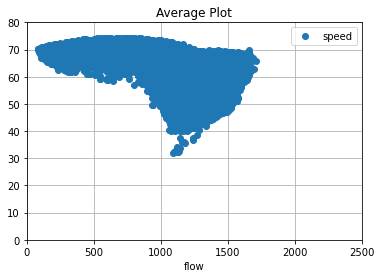

In [14]:
cali_avg_dataset.plot(
        x='flow',
        y='speed',
        style='o',
        title=f'Average Plot',
        xlim=[0,2500],
        ylim=[0,80],
        grid=True)

In [23]:
cali_avg_dataset_2 = pd.DataFrame(columns=cali_dataset.columns)
cali_avg_dataset_2 = cali_avg_dataset.append(
    [cali_dataset[cali_dataset["timestep"]==time].median()
    for time in cali_dataset["timestep"].unique()],
    ignore_index=True)
cali_avg_dataset_2.head()

,timestep,road_section,flow,density,speed
0,0.0,13.0,191.111111,1.440741,69.607407
1,1.0,13.0,209.770370,1.485185,69.066667
2,2.0,13.0,287.429630,1.940741,69.137037
3,3.0,13.0,391.874074,2.551852,69.162963
4,4.0,13.0,463.533333,2.962963,69.392593


<AxesSubplot:title={'center':'Average Plot'}, xlabel='flow', ylabel='speed'>

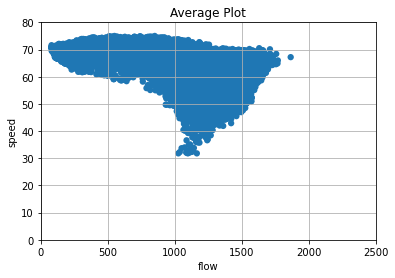

In [32]:
cali_avg_dataset_2.plot.scatter(
        x='flow',
        y='speed',
        s=40,
        facecolors='r',
        edgecolors='none',
        title=f'Average Plot',
        xlim=[0,2500],
        ylim=[0,80],
        grid=True
)

In [21]:
## Otras forma 2
cali_avg_dataset_2 = pd.DataFrame(columns=cali_dataset.columns)
for time in cali_dataset["timestep"].unique():
    cali_time_dataset = cali_dataset[cali_dataset["timestep"]==time]
    #print(cali_time_dataset.mean())
    cali_avg_dataset_3 = cali_avg_dataset.append(cali_time_dataset.mean(), ignore_index=True)
cali_avg_dataset_2.head()

KeyboardInterrupt: 

In [17]:
cali_avg_dataset.describe()

,timestep,road_section,flow,density,speed
count,105000.00000,105000.0,105000.000000,105000.000000,105000.000000
mean,52499.50000,13.0,964.138332,7.627407,64.368320
std,30311.03347,0.0,467.977722,4.369818,5.622365
min,0.00000,13.0,82.125926,0.574074,40.088889
25%,26249.75000,13.0,510.840741,3.566667,60.900000
50%,52499.50000,13.0,1176.962963,7.968519,65.970370
75%,78749.25000,13.0,1353.325926,10.666667,69.151852
max,104999.00000,13.0,1708.592593,21.003704,74.418519


C:\Users\jose0\anaconda3\envs\CUTMaC-CloudApps\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


     timestep  road_section   flow  density  speed
26          0            26  139.2      0.9   72.6
53          1            26  168.0      1.0   71.8
80          2            26  240.0      1.5   71.7
107         3            26  328.8      2.0   71.4
134         4            26  432.0      2.6   71.1


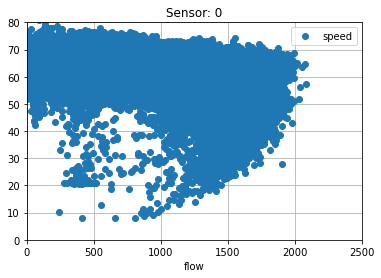

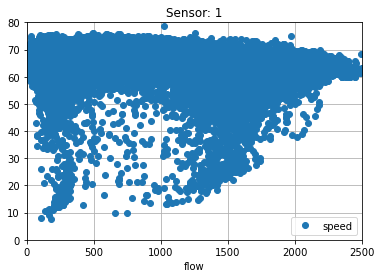

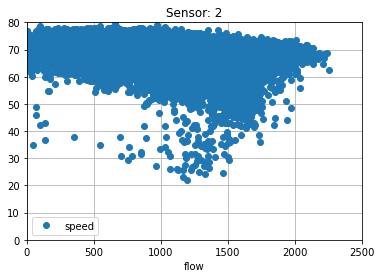

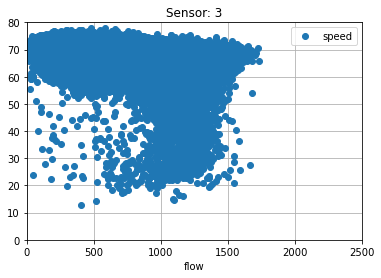

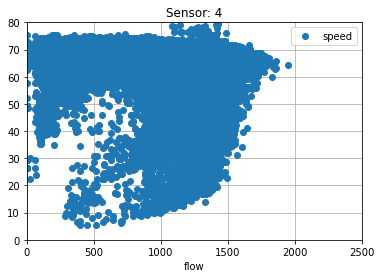

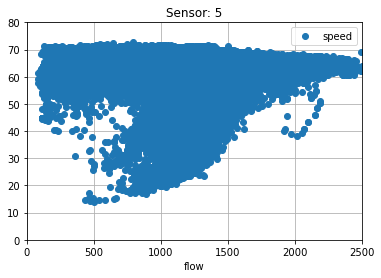

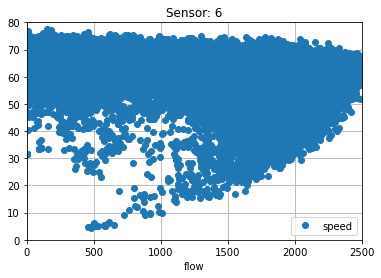

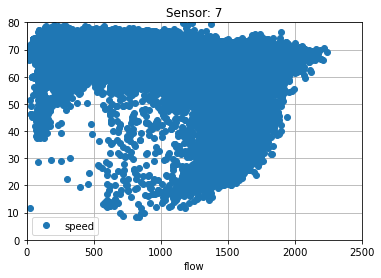

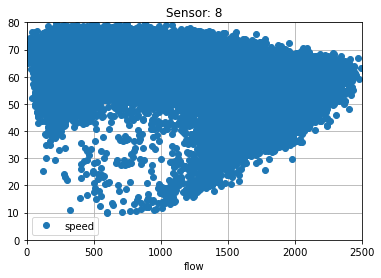

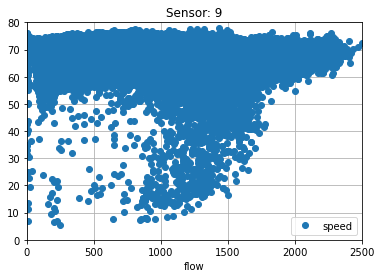

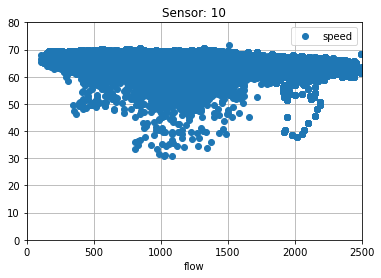

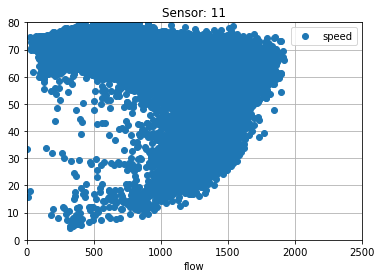

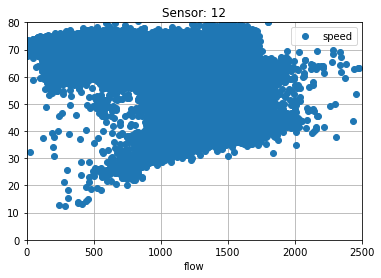

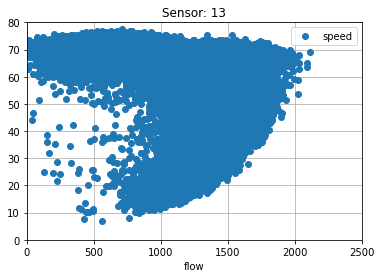

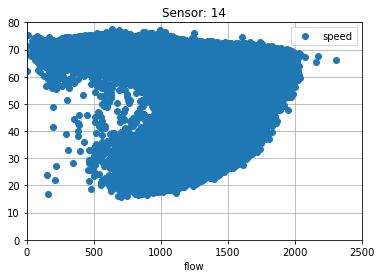

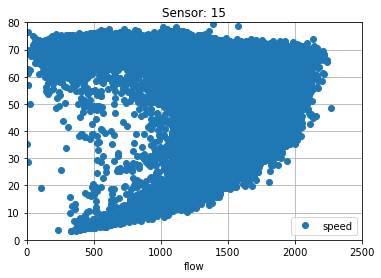

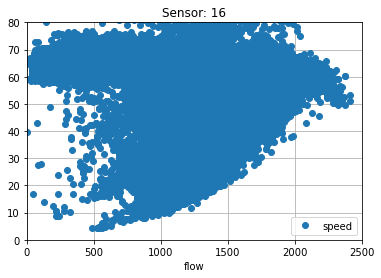

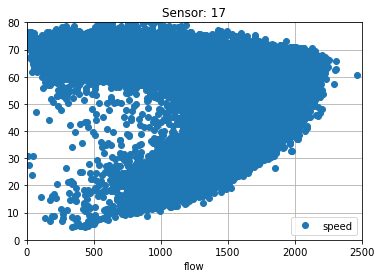

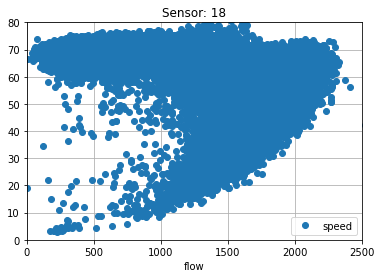

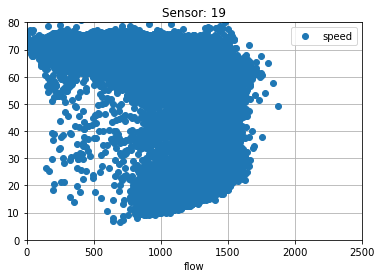

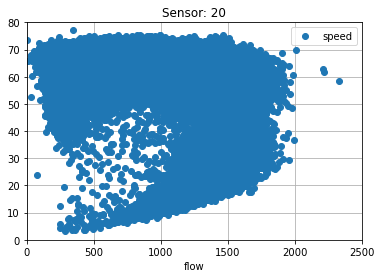

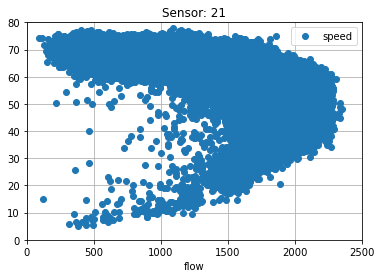

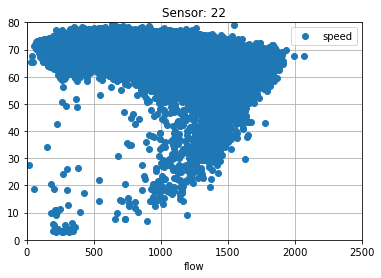

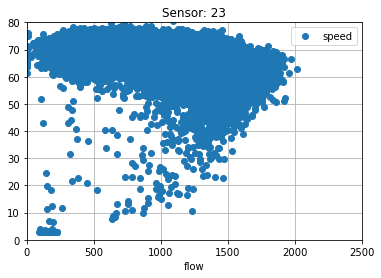

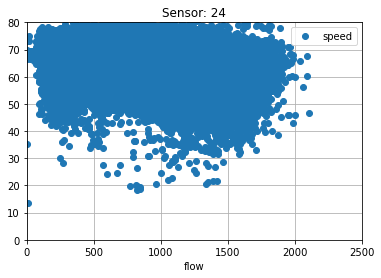

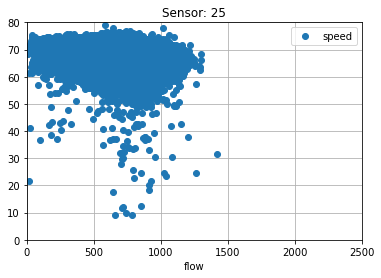

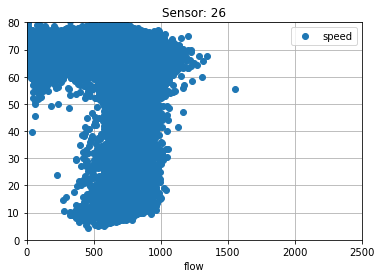

In [19]:
for sensor in cali_dataset["road_section"].unique():
    cali_sensor_dataset = cali_dataset[cali_dataset["road_section"]==sensor]
    cali_sensor_dataset.plot(
        x='flow',
        y='speed',
        style='o',
        title=f'Sensor: {sensor}',
        xlim=[0,2500],
        ylim=[0,80],
        grid=True)
print(cali_sensor_dataset.head())